In [2]:
#Data manipulation libraries
import pandas as pd
import numpy as np
import pickle

#Visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed
from sklearn.externals import joblib


#Machine Learning
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import zero_one_loss
from sklearn import linear_model
from sklearn import neural_network

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.externals import joblib
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RandomizedSearchCV


#Utilities Libraries
import os
import datetime
from datetime import date
from itertools import product
from sklearn.externals.six.moves import zip
from sklearn.datasets import make_gaussian_quantiles
import warnings


#Matplotlib Initialization
%matplotlib inline
matplotlib.style.use('ggplot')


warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'seaborn'

In [3]:
continuous_df = pd.read_csv('Continuous_DB.csv')
measures_df = pd.read_csv('Train_DB.csv')
test_df = pd.read_csv('Test_DB.csv')

In [4]:
Cleaned_df = measures_df[measures_df['timestamp'] > 1508914800000]
Cleaned_df_continuous = continuous_df[continuous_df['timestamp'] > 1508914800000]
Cleaned_df_test = test_df[test_df['timestamp'] > 1508914800000]

In [5]:
all_df = Cleaned_df.append(Cleaned_df_test)

In [6]:
all_df['timestamp'] = pd.to_datetime(Cleaned_df['timestamp'],unit='ms')
all_df['timestamp_dataset'] = pd.to_datetime(Cleaned_df['timestamp_dataset'],unit='ms')
#all_df['timestamp_measure_session'] = pd.to_datetime(Cleaned_df['timestamp_measure_session'],unit='ms')

Cleaned_df_continuous['timestamp'] = pd.to_datetime(Cleaned_df_continuous['timestamp'],unit='ms')
Cleaned_df_continuous['timestamp_dataset'] = pd.to_datetime(Cleaned_df_continuous['timestamp_dataset'],unit='ms')
#Cleaned_df_continuous['timestamp_measure_session'] = pd.to_datetime(Cleaned_df_continuous['timestamp_measure_session'],unit='ms')

In [7]:
all_df_continuous = Cleaned_df_continuous

In [8]:
all_df = all_df[all_df['sensor_position'] == 'haut_dos']
all_df_continuous = all_df_continuous[all_df_continuous['sensor_position'] == 'haut_dos']

In [9]:
all_df = all_df[all_df['date_naissance'].notnull()]
all_df_continuous = all_df_continuous[all_df_continuous['date_naissance'].notnull()]

In [10]:
all_df['timestamp_measure_session'] = all_df.timestamp_measure_session.astype(int)

In [11]:
all_df = all_df[(all_df['nom'] != 'Percy') & (all_df['prenom'] != 'David') & (all_df['timestamp_measure_session'] != 1513181871752)]
all_df_continuous = all_df_continuous[(all_df_continuous['nom'] != 'Percy') & (all_df_continuous['prenom'] != 'David') & (all_df_continuous['timestamp_measure_session'] != 1513181871752)]

all_df = all_df[all_df['nom'] != 'Phelippeau']
all_df_continuous = all_df_continuous[all_df_continuous['nom'] != 'Phelippeau']

all_df = all_df[all_df['nom'] != 'Bogdanova']
all_df_continuous = all_df_continuous[all_df_continuous['nom'] != 'Bogdanova']

all_df = all_df[all_df['nom'] != 'Kaur']
all_df_continuous = all_df_continuous[all_df_continuous['nom'] != 'Kaur']

all_df = all_df[all_df['nom'] != 'Gaumez']
all_df_continuous = all_df_continuous[all_df_continuous['nom'] != 'Gaumez']

all_df = all_df[all_df['nom'] != 'Dautel']
all_df_continuous = all_df_continuous[all_df_continuous['nom'] != 'Dautel']

all_df = all_df[all_df['nom'] != 'Marucchi']
all_df_continuous = all_df_continuous[all_df_continuous['nom'] != 'Marucchi']

all_df = all_df[all_df['nom'] != 'Chedeville']
all_df_continuous = all_df_continuous[all_df_continuous['nom'] != 'Chedeville']

all_df = all_df[all_df['nom'] != 'Fadel']
all_df_continuous = all_df_continuous[all_df_continuous['nom'] != 'Fadel']

all_df = all_df[all_df['nom'] != 'Leperes']
all_df_continuous = all_df_continuous[all_df_continuous['nom'] != 'Leperes']

all_df = all_df[all_df['nom'] != 'Puyo']
all_df_continuous = all_df_continuous[all_df_continuous['nom'] != 'Puyo']

all_df = all_df[all_df['nom'] != 'TEST']
all_df_continuous = all_df_continuous[all_df_continuous['nom'] != 'TEST']

all_df = all_df[all_df['nom'] != 'TEST1']
all_df_continuous = all_df_continuous[all_df_continuous['nom'] != 'TEST1']

all_df = all_df[all_df['nom'] != 'KAMBAJI']
all_df = all_df[all_df['nom'] != 'Lutambi']
all_df_continuous = all_df_continuous[all_df_continuous['nom'] != 'KAMBAJI']
all_df_continuous = all_df_continuous[all_df_continuous['nom'] != 'Lutambi']

all_df = all_df[all_df['nom'] != 'Pighetti']
all_df = all_df[all_df['nom'] != 'Gastaud']
all_df_continuous = all_df_continuous[all_df_continuous['nom'] != 'Pighetti']
all_df_continuous = all_df_continuous[all_df_continuous['nom'] != 'Gastaud']

all_df = all_df[all_df['nom'] != 'Carniel']
all_df_continuous = all_df_continuous[all_df_continuous['nom'] != 'Carniel']


In [12]:
new_df = all_df[(all_df['nom'] == 'Fadel') | (all_df['nom'] == 'Leperes') | (all_df['nom'] == 'Puyo')]

In [13]:
all_df = all_df.convert_objects(convert_numeric = True)
all_df_continuous = all_df_continuous.convert_objects(convert_numeric = True)

In [14]:
all_df['date_naissance'][all_df['date_naissance'] == '1191-01-07'] = '1991-01-07'
all_df_continuous['date_naissance'][all_df_continuous['date_naissance'] == '1191-01-07'] = '1991-01-07'

all_df['date_naissance'][all_df['date_naissance'] == '2018-02-15'] = '1998-02-15'
all_df_continuous['date_naissance'][all_df_continuous['date_naissance'] == '2018-02-15'] = '1998-02-15'

In [15]:
all_df['date_naissance'] = pd.to_datetime(all_df.date_naissance)
all_df_continuous['date_naissance'] = pd.to_datetime(all_df_continuous.date_naissance)

In [16]:
all_df['age'] = 0
all_df_continuous['age'] = 0

In [17]:
now = pd.Timestamp(datetime.datetime.now())

all_df['date_naissance'] = pd.to_datetime(all_df['date_naissance'], format='%m%d%y')
all_df_continuous['date_naissance'] = pd.to_datetime(all_df_continuous['date_naissance'], format='%m%d%y')

all_df['age'] = (now - all_df['date_naissance']).astype('<m8[Y]')
all_df_continuous['age'] = (now - all_df_continuous['date_naissance']).astype('<m8[Y]')

In [18]:
all_df['age'][all_df['age'] == 136.0] = 36.0
all_df_continuous['age'][all_df_continuous['age'] == 136.0] = 36.0

In [19]:
all_df['age'] = pd.to_numeric(all_df.age, downcast = 'integer')
all_df_continuous['age'] = pd.to_numeric(all_df_continuous.age, downcast = 'integer')

In [20]:
all_df.reset_index(inplace = True)
all_df_continuous.reset_index(inplace = True)

In [21]:
all_df = all_df.drop('index', axis = 1)
all_df_continuous = all_df_continuous.drop('index', axis = 1)

In [22]:
all_df['range_age'] = 0
all_df['range_taille'] = 0
all_df['range_poids'] = 0

all_df_continuous['range_age'] = 0
all_df_continuous['range_taille'] = 0
all_df_continuous['range_poids'] = 0

In [23]:
all_df['range_age'][all_df['age'] < 20.0] = -20
all_df['range_age'][(all_df['age'] >= 20.0) & (all_df['age'] < 25.0)] = 20
all_df['range_age'][(all_df['age'] >= 25.0) & (all_df['age'] < 30.0)] = 25
all_df['range_age'][(all_df['age'] >= 30.0) & (all_df['age'] < 35.0)] = 30
all_df['range_age'][(all_df['age'] >= 35.0) & (all_df['age'] < 40.0)] = 35
all_df['range_age'][(all_df['age'] >= 40.0) & (all_df['age'] < 50.0)] = 40
all_df['range_age'][(all_df['age'] >= 50.0) & (all_df['age'] < 60.0)] = 50
all_df['range_age'][all_df['age'] >= 60.0] = 60

all_df_continuous['range_age'][all_df_continuous['age'] < 20.0] = -20
all_df_continuous['range_age'][(all_df_continuous['age'] >= 20.0) & (all_df_continuous['age'] < 25.0)] = 20
all_df_continuous['range_age'][(all_df_continuous['age'] >= 25.0) & (all_df_continuous['age'] < 30.0)] = 25
all_df_continuous['range_age'][(all_df_continuous['age'] >= 30.0) & (all_df_continuous['age'] < 35.0)] = 30
all_df_continuous['range_age'][(all_df_continuous['age'] >= 35.0) & (all_df_continuous['age'] < 40.0)] = 35
all_df_continuous['range_age'][(all_df_continuous['age'] >= 40.0) & (all_df_continuous['age'] < 50.0)] = 40
all_df_continuous['range_age'][(all_df_continuous['age'] >= 50.0) & (all_df_continuous['age'] < 60.0)] = 50
all_df_continuous['range_age'][all_df_continuous['age'] >= 60.0] = 60



all_df['range_taille'][all_df['taille'] < 140.0] = -140
all_df['range_taille'][(all_df['taille'] >= 140.0) & (all_df['taille'] < 150.0)] = 140
all_df['range_taille'][(all_df['taille'] >= 150.0) & (all_df['taille'] < 160.0)] = 150
all_df['range_taille'][(all_df['taille'] >= 160.0) & (all_df['taille'] < 170.0)] = 160
all_df['range_taille'][(all_df['taille'] >= 170.0) & (all_df['taille'] < 180.0)] = 170
all_df['range_taille'][(all_df['taille'] >= 180.0) & (all_df['taille'] < 190.0)] = 180
all_df['range_taille'][all_df['taille'] >= 190.0] = 190

all_df_continuous['range_taille'][all_df_continuous['taille'] < 140.0] = -140
all_df_continuous['range_taille'][(all_df_continuous['taille'] >= 140.0) & (all_df_continuous['taille'] < 150.0)] = 140
all_df_continuous['range_taille'][(all_df_continuous['taille'] >= 150.0) & (all_df_continuous['taille'] < 160.0)] = 150
all_df_continuous['range_taille'][(all_df_continuous['taille'] >= 160.0) & (all_df_continuous['taille'] < 170.0)] = 160
all_df_continuous['range_taille'][(all_df_continuous['taille'] >= 170.0) & (all_df_continuous['taille'] < 180.0)] = 170
all_df_continuous['range_taille'][(all_df_continuous['taille'] >= 180.0) & (all_df_continuous['taille'] < 190.0)] = 180
all_df_continuous['range_taille'][all_df_continuous['taille'] >= 190.0] = 190



all_df['range_poids'][all_df['poids'] < 40.0] = -40
all_df['range_poids'][(all_df['poids'] >= 40.0) & (all_df['poids'] < 45.0)] = 40
all_df['range_poids'][(all_df['poids'] >= 45.0) & (all_df['poids'] < 50.0)] = 45
all_df['range_poids'][(all_df['poids'] >= 50.0) & (all_df['poids'] < 55.0)] = 50
all_df['range_poids'][(all_df['poids'] >= 55.0) & (all_df['poids'] < 60.0)] = 55
all_df['range_poids'][(all_df['poids'] >= 60.0) & (all_df['poids'] < 65.0)] = 60
all_df['range_poids'][(all_df['poids'] >= 65.0) & (all_df['poids'] < 70.0)] = 65
all_df['range_poids'][(all_df['poids'] >= 70.0) & (all_df['poids'] < 75.0)] = 70
all_df['range_poids'][(all_df['poids'] >= 75.0) & (all_df['poids'] < 80.0)] = 75
all_df['range_poids'][(all_df['poids'] >= 80.0) & (all_df['poids'] < 85.0)] = 80
all_df['range_poids'][(all_df['poids'] >= 85.0) & (all_df['poids'] < 90.0)] = 85
all_df['range_poids'][(all_df['poids'] >= 90.0) & (all_df['poids'] < 95.0)] = 90
all_df['range_poids'][(all_df['poids'] >= 95.0) & (all_df['poids'] < 100.0)] = 95
all_df['range_poids'][all_df['poids'] >= 100.0] = 100

all_df_continuous['range_poids'][all_df_continuous['poids'] < 40.0] = -40
all_df_continuous['range_poids'][(all_df_continuous['poids'] >= 40.0) & (all_df_continuous['poids'] < 45.0)] = 40
all_df_continuous['range_poids'][(all_df_continuous['poids'] >= 45.0) & (all_df_continuous['poids'] < 50.0)] = 45
all_df_continuous['range_poids'][(all_df_continuous['poids'] >= 50.0) & (all_df_continuous['poids'] < 55.0)] = 50
all_df_continuous['range_poids'][(all_df_continuous['poids'] >= 55.0) & (all_df_continuous['poids'] < 60.0)] = 55
all_df_continuous['range_poids'][(all_df_continuous['poids'] >= 60.0) & (all_df_continuous['poids'] < 65.0)] = 60
all_df_continuous['range_poids'][(all_df_continuous['poids'] >= 65.0) & (all_df_continuous['poids'] < 70.0)] = 65
all_df_continuous['range_poids'][(all_df_continuous['poids'] >= 70.0) & (all_df_continuous['poids'] < 75.0)] = 70
all_df_continuous['range_poids'][(all_df_continuous['poids'] >= 75.0) & (all_df_continuous['poids'] < 80.0)] = 75
all_df_continuous['range_poids'][(all_df_continuous['poids'] >= 80.0) & (all_df_continuous['poids'] < 85.0)] = 80
all_df_continuous['range_poids'][(all_df_continuous['poids'] >= 85.0) & (all_df_continuous['poids'] < 90.0)] = 85
all_df_continuous['range_poids'][(all_df_continuous['poids'] >= 90.0) & (all_df_continuous['poids'] < 95.0)] = 90
all_df_continuous['range_poids'][(all_df_continuous['poids'] >= 95.0) & (all_df_continuous['poids'] < 100.0)] = 95
all_df_continuous['range_poids'][all_df_continuous['poids'] >= 100.0] = 100

In [24]:
all_df['imc'] = 0.0
all_df_continuous['imc'] = 0.0

all_df['taille'] = all_df['taille'] / 100
all_df_continuous['taille'] = all_df_continuous['taille'] / 100

all_df['imc'] = all_df['poids'] / (all_df['taille'] * all_df['taille'])
all_df_continuous['imc'] = all_df_continuous['poids'] / (all_df_continuous['taille'] * all_df_continuous['taille'])

all_df['imc'] = all_df.imc.astype(int)
all_df_continuous['imc'] = all_df_continuous.imc.astype(int)

In [25]:
Cleaned_df = all_df
Cleaned_df_continuous = all_df_continuous

Cleaned_df.to_csv('Cleaned_df.csv', index = False)
Cleaned_df_continuous.to_csv('Cleaned_df_continuous.csv', index = False)

### We will only keep some postures...


these we will keep are: 
    
    - 1 : debout droit
    - 2 : Assis droit
    - 3 : flexion assis niveau 1
    - 4 : flexion assis niveau 2
    - 5 : flexion assis niveau 3
    - 8 : inclinaison droite assis, niveau 1
    - 9 : inclinaison droite assis, niveau 2
    - 10 : inclinaison droite assis, niveau 3
    - 11 : inclinaison gauche assis, niveau 1
    - 12 : inclinaison gauche assis, niveau 2
    - 13 : inclinaison gauche assis, niveau 3
    - 14 : flexion deux coudes sur la table niveau 1
    - 15 : flexion deux coudes sur la table niveau 2
    - 26 : Debout droit, faire une flexion maximum (essayer de toucher les pieds) sans forcer
    - 27 : Debout en inclinaison droite, effectuer une inclinaison gauche (mouvement actif sur phase d'acquisition)

In [26]:
Cleaned_df = Cleaned_df[(Cleaned_df['posture_id'] == 1) | 
                                     (Cleaned_df['posture_id'] == 2) | (Cleaned_df['posture_id'] == 3) | 
                                     (Cleaned_df['posture_id'] == 4) | (Cleaned_df['posture_id'] == 5) | 
                                     (Cleaned_df['posture_id'] == 6) | (Cleaned_df['posture_id'] == 7) | 
                                     (Cleaned_df['posture_id'] == 8) | (Cleaned_df['posture_id'] == 9) | 
                                     (Cleaned_df['posture_id'] == 10) | (Cleaned_df['posture_id'] == 11) | 
                                     (Cleaned_df['posture_id'] == 12) | (Cleaned_df['posture_id'] == 13) |
                                     (Cleaned_df['posture_id'] == 14) | (Cleaned_df['posture_id'] == 15) |
                                     (Cleaned_df['posture_id'] == 16) | (Cleaned_df['posture_id'] == 17) |
                                     (Cleaned_df['posture_id'] == 18) | (Cleaned_df['posture_id'] == 19) |
                                     (Cleaned_df['posture_id'] == 26) | (Cleaned_df['posture_id'] == 27)]



new_df = new_df[(new_df['posture_id'] == 1) | 
                                     (new_df['posture_id'] == 2) | (new_df['posture_id'] == 3) | 
                                     (new_df['posture_id'] == 4) | (new_df['posture_id'] == 5) | 
                                     (new_df['posture_id'] == 6) | (new_df['posture_id'] == 7) | 
                                     (new_df['posture_id'] == 8) | (new_df['posture_id'] == 9) | 
                                     (new_df['posture_id'] == 10) | (new_df['posture_id'] == 11) | 
                                     (new_df['posture_id'] == 12) | (new_df['posture_id'] == 13) |
                                     (new_df['posture_id'] == 14) | (new_df['posture_id'] == 15) |
                                     (new_df['posture_id'] == 16) | (new_df['posture_id'] == 17) |
                                     (new_df['posture_id'] == 18) | (new_df['posture_id'] == 19) |
                                     (new_df['posture_id'] == 26) | (new_df['posture_id'] == 27)]

In [27]:
Cleaned_df['Inclinaison'] = 0
Cleaned_df['Flexion'] = 0

Cleaned_df_continuous['Inclinaison'] = 0
Cleaned_df_continuous['Flexion'] = 0

new_df['Inclinaison'] = 0
new_df['Flexion'] = 0

In [28]:
#Correcting the inclinaison and flexion clumns to have to right values depending on the posture_id
Cleaned_df['Flexion'][Cleaned_df.posture_id == 1] = 0
Cleaned_df['Flexion'][Cleaned_df.posture_id == 2] = 0
Cleaned_df['Flexion'][Cleaned_df.posture_id == 3] = 3
Cleaned_df['Flexion'][Cleaned_df.posture_id == 4] = 5
Cleaned_df['Flexion'][Cleaned_df.posture_id == 5] = 8
Cleaned_df['Flexion'][Cleaned_df.posture_id == 6] = -2
Cleaned_df['Flexion'][Cleaned_df.posture_id == 7] = -5
Cleaned_df['Flexion'][Cleaned_df.posture_id == 8] = 1
Cleaned_df['Flexion'][Cleaned_df.posture_id == 9] = 2
Cleaned_df['Flexion'][Cleaned_df.posture_id == 10] = 3
Cleaned_df['Flexion'][Cleaned_df.posture_id == 11] = 1
Cleaned_df['Flexion'][Cleaned_df.posture_id == 12] = 2
Cleaned_df['Flexion'][Cleaned_df.posture_id == 13] = 3
Cleaned_df['Flexion'][Cleaned_df.posture_id == 14] = 4
Cleaned_df['Flexion'][Cleaned_df.posture_id == 15] = 7
Cleaned_df['Flexion'][Cleaned_df.posture_id == 16] = 3.5
Cleaned_df['Flexion'][Cleaned_df.posture_id == 17] = 6
Cleaned_df['Flexion'][Cleaned_df.posture_id == 18] = 3.5
Cleaned_df['Flexion'][Cleaned_df.posture_id == 19] = 6


new_df['Flexion'][new_df.posture_id == 1] = 0
new_df['Flexion'][new_df.posture_id == 2] = 0
new_df['Flexion'][new_df.posture_id == 3] = 3
new_df['Flexion'][new_df.posture_id == 4] = 5
new_df['Flexion'][new_df.posture_id == 5] = 8
new_df['Flexion'][new_df.posture_id == 6] = -2
new_df['Flexion'][new_df.posture_id == 7] = -5
new_df['Flexion'][new_df.posture_id == 8] = 1
new_df['Flexion'][new_df.posture_id == 9] = 2
new_df['Flexion'][new_df.posture_id == 10] = 3
new_df['Flexion'][new_df.posture_id == 11] = 1
new_df['Flexion'][new_df.posture_id == 12] = 2
new_df['Flexion'][new_df.posture_id == 13] = 3
new_df['Flexion'][new_df.posture_id == 14] = 4
new_df['Flexion'][new_df.posture_id == 15] = 7
new_df['Flexion'][new_df.posture_id == 16] = 3.5
new_df['Flexion'][new_df.posture_id == 17] = 6
new_df['Flexion'][new_df.posture_id == 18] = 3.5
new_df['Flexion'][new_df.posture_id == 19] = 6


Cleaned_df['Inclinaison'][Cleaned_df.posture_id == 1] = 0
Cleaned_df['Inclinaison'][Cleaned_df.posture_id == 2] = 0
Cleaned_df['Inclinaison'][Cleaned_df.posture_id == 3] = 0
Cleaned_df['Inclinaison'][Cleaned_df.posture_id == 4] = 0
Cleaned_df['Inclinaison'][Cleaned_df.posture_id == 5] = 0
Cleaned_df['Inclinaison'][Cleaned_df.posture_id == 6] = 0
Cleaned_df['Inclinaison'][Cleaned_df.posture_id == 7] = 0
Cleaned_df['Inclinaison'][Cleaned_df.posture_id == 8] = 1
Cleaned_df['Inclinaison'][Cleaned_df.posture_id == 9] = 2
Cleaned_df['Inclinaison'][Cleaned_df.posture_id == 10] = 4
Cleaned_df['Inclinaison'][Cleaned_df.posture_id == 11] = -1
Cleaned_df['Inclinaison'][Cleaned_df.posture_id == 12] = -2
Cleaned_df['Inclinaison'][Cleaned_df.posture_id == 13] = -4
Cleaned_df['Inclinaison'][Cleaned_df.posture_id == 14] = 0
Cleaned_df['Inclinaison'][Cleaned_df.posture_id == 15] = 0
Cleaned_df['Inclinaison'][Cleaned_df.posture_id == 16] = 1
Cleaned_df['Inclinaison'][Cleaned_df.posture_id == 17] = 2
Cleaned_df['Inclinaison'][Cleaned_df.posture_id == 18] = -1
Cleaned_df['Inclinaison'][Cleaned_df.posture_id == 19] = -2

new_df['Inclinaison'][new_df.posture_id == 1] = 0
new_df['Inclinaison'][new_df.posture_id == 2] = 0
new_df['Inclinaison'][new_df.posture_id == 3] = 0
new_df['Inclinaison'][new_df.posture_id == 4] = 0
new_df['Inclinaison'][new_df.posture_id == 5] = 0
new_df['Inclinaison'][new_df.posture_id == 6] = 0
new_df['Inclinaison'][new_df.posture_id == 7] = 0
new_df['Inclinaison'][new_df.posture_id == 8] = 1
new_df['Inclinaison'][new_df.posture_id == 9] = 2
new_df['Inclinaison'][new_df.posture_id == 10] = 4
new_df['Inclinaison'][new_df.posture_id == 11] = -1
new_df['Inclinaison'][new_df.posture_id == 12] = -2
new_df['Inclinaison'][new_df.posture_id == 13] = -4
new_df['Inclinaison'][new_df.posture_id == 14] = 0
new_df['Inclinaison'][new_df.posture_id == 15] = 0
new_df['Inclinaison'][new_df.posture_id == 16] = 1
new_df['Inclinaison'][new_df.posture_id == 17] = 2
new_df['Inclinaison'][new_df.posture_id == 18] = -1
new_df['Inclinaison'][new_df.posture_id == 19] = -2

In [29]:
columns = ['acc_x', 'acc_y', 'acc_z', 'cal_acc_x', 'cal_acc_y', 'cal_acc_z','nom', 'Inclinaison', 'Flexion',
           'posture', 'posture_id', 'imc', 'range_poids', 'range_taille', 'range_age', 'timestamp_measure_session']

In [30]:
dos_train = pd.DataFrame()
dos_train = Cleaned_df[columns]

In [31]:
dos_train.reset_index(inplace = True)
dos_train.drop('index', axis = 1, inplace = True)

In [32]:
dos_train.shape

(220240, 16)

# Transformation

In [33]:
def dot_prod(x1, y1, z1, x2, y2, z2):
    return (x1 * x2) + (y1 * y2) + (z1 * z2)

def vec_norm(x, y, z):
    return np.sqrt(x**2 + y**2 + z**2)

def angle_teta(x1, y1, z1, x2, y2, z2):
    return np.arccos(dot_prod(x1, y1, z1, x2, y2, z2) / vec_norm(x1, y1, z1) * vec_norm(x2, y2, z2))

# Matrix rotation functions

def rot_around_x(x, y, z, teta):
    xp = x
    yp = y * np.cos(teta) - z * np.sin(teta)
    zp = y * np.sin(teta) + z * np.cos(teta)
    return xp, yp, zp

def rot_around_y(x, y, z, teta):
    xp = x * np.cos(teta) + z * np.sin(teta)
    yp = y
    zp = -x * np.sin(teta) + z * np.cos(teta)
    return xp, yp, zp

def rot_around_z(x, y, z, teta):
    xp = x * np.cos(teta) - y * np.sin(teta)
    yp = x * np.sin(teta) + y * np.cos(teta)
    zp = z
    return xp, yp, zp

def computeTP(accX, accY, accZ):
    teta = np.arctan2(accX, -accY)
    phi = np.arctan2(accX * np.sin(teta) - accY * np.cos(teta), accZ)

    return teta, phi

# Flexion & Inclinaison angles
def computeFI(accX, accY, accZ, degres=False):
    teta, phi = computeTP(accX, accY, accZ)

    FE = phi * np.cos(teta)
    LF = phi * np.sin(teta)

    if degres:
        return FE, LF
    else:
        return FE*180/np.pi, LF*180/np.pi

In [34]:
dos_train['x'] =  -dos_train['acc_y']
dos_train['y'] =  dos_train['acc_z']
dos_train['z'] =  -dos_train['acc_x']

dos_train['cal_x'] =  -dos_train['cal_acc_y']
dos_train['cal_y'] =  dos_train['cal_acc_z']
dos_train['cal_z'] =  -dos_train['cal_acc_x']

In [35]:
dos_train['norm'] =  np.sqrt(dos_train['x'] ** 2 + dos_train['y'] ** 2 + dos_train['z'] ** 2)
dos_train['cal_norm'] =  np.sqrt(dos_train['cal_x'] ** 2 + dos_train['cal_y'] ** 2 + dos_train['cal_z'] ** 2)

dos_train['acc_x_norm'] =  dos_train['x'] / dos_train['norm']
dos_train['acc_y_norm'] =  dos_train['y'] / dos_train['norm']
dos_train['acc_z_norm'] =  dos_train['z'] / dos_train['norm']
dos_train['cal_acc_x_norm'] =  dos_train['cal_x'] / dos_train['cal_norm']
dos_train['cal_acc_y_norm'] =  dos_train['cal_y'] / dos_train['cal_norm']
dos_train['cal_acc_z_norm'] =  dos_train['cal_z'] / dos_train['cal_norm']

In [36]:
dos_train['teta'] =  np.arctan(dos_train['cal_acc_x_norm'] / dos_train['cal_acc_z_norm'])
dos_train['temp_cal_x_normalized'], dos_train['temp_cal_y_normalized'], dos_train['temp_cal_z_normalized'] = rot_around_y(dos_train['cal_acc_x_norm'], dos_train['cal_acc_y_norm'], dos_train['cal_acc_z_norm'], -dos_train['teta'])

dos_train['phi'] =  np.arctan(dos_train['temp_cal_y_normalized'] / dos_train['temp_cal_z_normalized'])
dos_train['temp_x_normalized'], dos_train['temp_y_normalized'], dos_train['temp_z_normalized'] = rot_around_y(dos_train['acc_x_norm'], dos_train['acc_y_norm'], dos_train['acc_z_norm'], -dos_train['teta'])
dos_train['x_calibrated'], dos_train['y_calibrated'], dos_train['z_calibrated'] = rot_around_x(dos_train['temp_x_normalized'], dos_train['temp_y_normalized'], dos_train['temp_z_normalized'], dos_train['phi'])

dos_train['FE'], dos_train['LF'] = computeFI(dos_train['x_calibrated'], dos_train['y_calibrated'], dos_train['z_calibrated'], True)


In [37]:
dos_train.columns

Index(['acc_x', 'acc_y', 'acc_z', 'cal_acc_x', 'cal_acc_y', 'cal_acc_z', 'nom',
       'Inclinaison', 'Flexion', 'posture', 'posture_id', 'imc', 'range_poids',
       'range_taille', 'range_age', 'timestamp_measure_session', 'x', 'y', 'z',
       'cal_x', 'cal_y', 'cal_z', 'norm', 'cal_norm', 'acc_x_norm',
       'acc_y_norm', 'acc_z_norm', 'cal_acc_x_norm', 'cal_acc_y_norm',
       'cal_acc_z_norm', 'teta', 'temp_cal_x_normalized',
       'temp_cal_y_normalized', 'temp_cal_z_normalized', 'phi',
       'temp_x_normalized', 'temp_y_normalized', 'temp_z_normalized',
       'x_calibrated', 'y_calibrated', 'z_calibrated', 'FE', 'LF'],
      dtype='object')

In [38]:
columns = ['nom', 'Inclinaison', 'Flexion', 'posture', 'posture_id', 'timestamp_measure_session',
            'x_calibrated', 'y_calibrated', 'z_calibrated', 'FE', 'LF']

In [39]:
dos_train = dos_train[columns]

In [156]:
dos_train.to_csv('dos_train.csv', index = False)

# Getting the 10 smallest FE of posture_id == 26

In [40]:
only_posture_26 = dos_train[dos_train['posture_id'] == 26]
only_posture_27 = dos_train[dos_train['posture_id'] == 27]

In [41]:
only_posture_27_pos = only_posture_27[only_posture_27.LF > 0]
only_posture_27_neg = only_posture_27[only_posture_27.LF < 0]

In [42]:
only_posture_27_pos.posture_id = 30
only_posture_27_neg.posture_id = 31

In [43]:
only_posture_27_pos['Inclinaison'] = 5
only_posture_27_neg['Inclinaison'] = -5
only_posture_27_pos['Flexion'] = 2.5
only_posture_27_neg['Flexion'] = 2.5

only_posture_26['Inclinaison'] = 0
only_posture_26['Flexion'] = 20

In [44]:
dos_train = dos_train[(dos_train.posture_id != 26) & (dos_train.posture_id!= 27)]

In [45]:
unique_timestamps = dos_train.timestamp_measure_session.unique()

In [46]:
dos_train.shape

(199316, 11)

In [47]:
for item in unique_timestamps:
    minval = only_posture_26[only_posture_26.timestamp_measure_session == item]['FE'].min()
    relativemin = minval - (10 * minval / 100)
    to_add = only_posture_26[(only_posture_26.timestamp_measure_session == item) & (only_posture_26.FE > minval) & (only_posture_26.FE < relativemin)]
    
    dos_train = dos_train.append(to_add)

In [48]:
for item in unique_timestamps:
    minval = only_posture_27_neg[only_posture_27_neg.timestamp_measure_session == item]['LF'].min()
    relativemin = minval - (25 * minval / 100)
    to_add = only_posture_27_neg[(only_posture_27_neg.timestamp_measure_session == item) & (only_posture_27_neg.LF > minval) & (only_posture_27_neg.LF < relativemin)]
    
    
    dos_train = dos_train.append(to_add)

In [49]:
for item in unique_timestamps:
    maxval = only_posture_27_pos[only_posture_27_pos.timestamp_measure_session == item]['LF'].max()
    relativemax = maxval - (25 * maxval / 100)
    to_add = only_posture_27_pos[(only_posture_27_pos.timestamp_measure_session == item) & (only_posture_27_pos.LF < maxval) & (only_posture_27.LF > relativemax)]
    
    dos_train = dos_train.append(to_add)

In [50]:
#for item in unique_timestamps:
#    to_add = only_posture_26[only_posture_26.timestamp_measure_session == item].nsmallest(20, 'FE')
#    dos_train = dos_train.append(to_add)

In [51]:
dos_train.shape

(206952, 11)

In [60]:
dos_train.to_csv('dos_train.csv', index = False)

# Data is cleaned and ready for training.

## Some visualizations

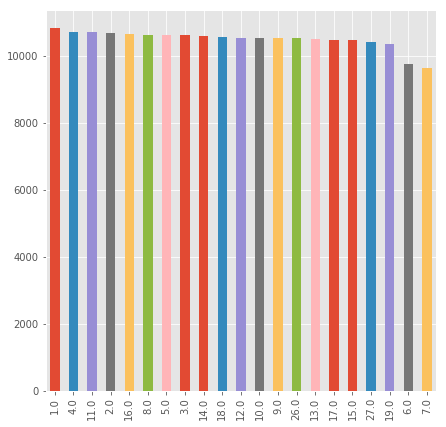

In [52]:
fig, ax = plt.subplots(figsize = (7, 7))
Cleaned_df['posture_id'].value_counts().sort_values(ascending=False).plot(kind='bar');

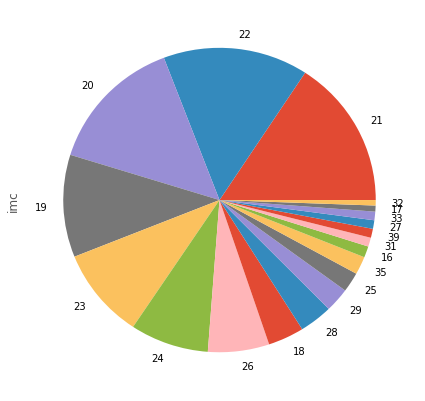

In [54]:
fig, ax = plt.subplots(figsize = (7, 7))
Cleaned_df['imc'].value_counts().sort_values(ascending=False).plot(kind='pie')

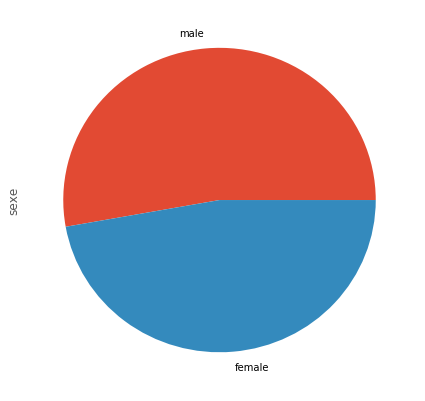

In [55]:
fig, ax = plt.subplots(figsize = (7, 7))
Cleaned_df['sexe'].value_counts().sort_values(ascending=False).plot(kind='pie')

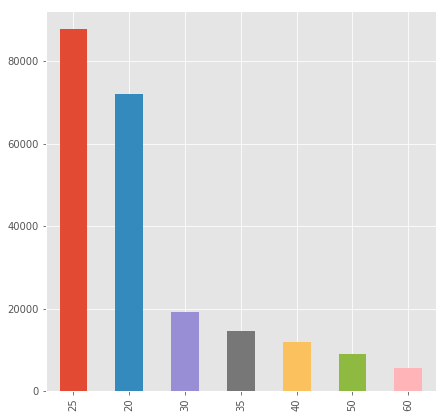

In [56]:
fig, ax = plt.subplots(figsize = (7, 7))
Cleaned_df['range_age'].value_counts().sort_values(ascending=False).plot(kind='bar');

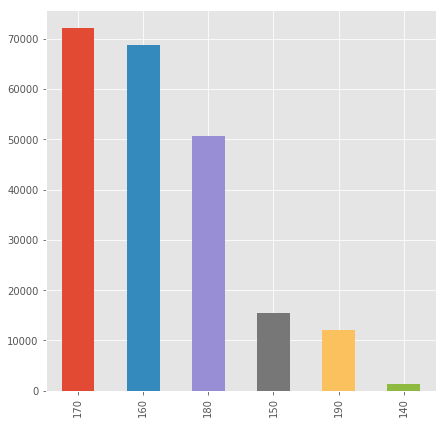

In [57]:
fig, ax = plt.subplots(figsize = (7, 7))
Cleaned_df['range_taille'].value_counts().sort_values(ascending=False).plot(kind='bar');

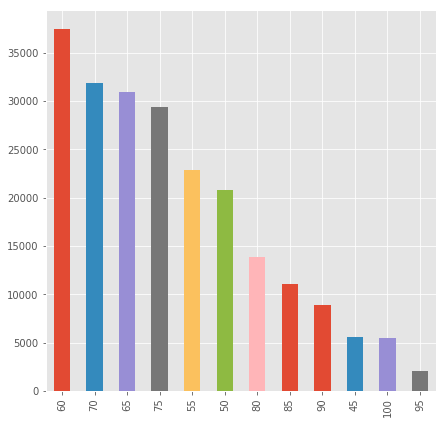

In [58]:
fig, ax = plt.subplots(figsize = (7, 7))
Cleaned_df['range_poids'].value_counts().sort_values(ascending=False).plot(kind='bar');

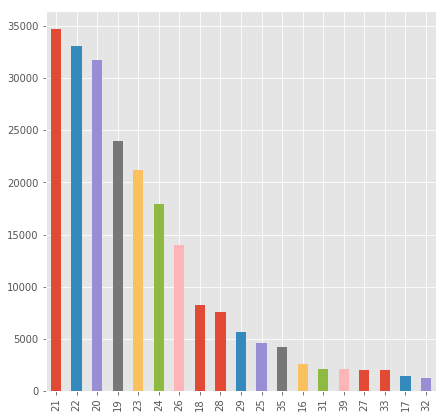

In [59]:
fig, ax = plt.subplots(figsize = (7, 7))
Cleaned_df['imc'].value_counts().sort_values(ascending=False).plot(kind='bar');

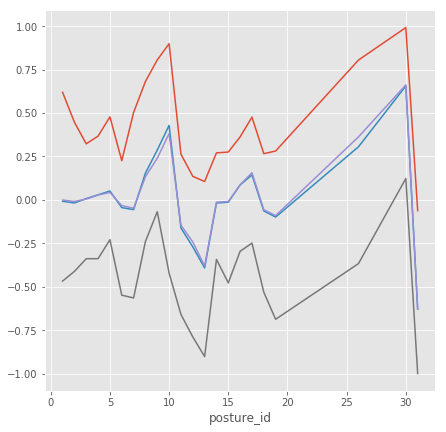

In [60]:
fig, ax = plt.subplots(figsize = (7, 7))
dos_train.groupby('posture_id')['x_calibrated'].max().plot(kind='line')
dos_train.groupby('posture_id')['x_calibrated'].mean().plot(kind='line')
dos_train.groupby('posture_id')['x_calibrated'].median().plot(kind='line')
dos_train.groupby('posture_id')['x_calibrated'].min().plot(kind='line');

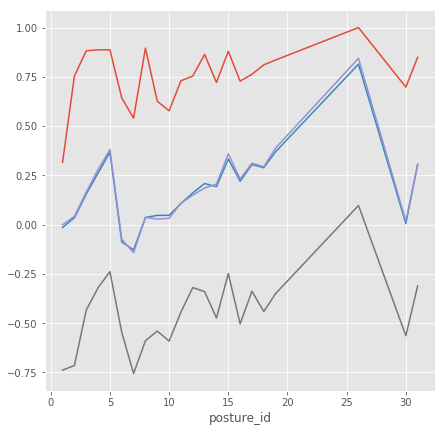

In [61]:
fig, ax = plt.subplots(figsize = (7, 7))
dos_train.groupby('posture_id')['y_calibrated'].max().plot(kind='line')
dos_train.groupby('posture_id')['y_calibrated'].mean().plot(kind='line')
dos_train.groupby('posture_id')['y_calibrated'].median().plot(kind='line')
dos_train.groupby('posture_id')['y_calibrated'].min().plot(kind='line');

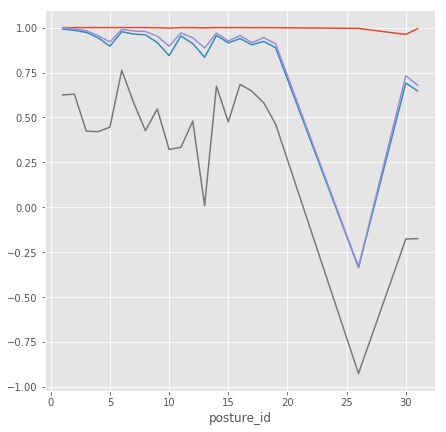

In [62]:
fig, ax = plt.subplots(figsize = (7, 7))
dos_train.groupby('posture_id')['z_calibrated'].max().plot(kind='line')
dos_train.groupby('posture_id')['z_calibrated'].mean().plot(kind='line')
dos_train.groupby('posture_id')['z_calibrated'].median().plot(kind='line')
dos_train.groupby('posture_id')['z_calibrated'].min().plot(kind='line');

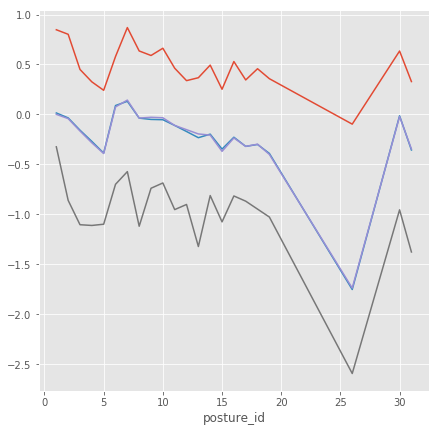

In [63]:
fig, ax = plt.subplots(figsize = (7, 7))
dos_train.groupby('posture_id')['FE'].max().plot(kind='line')
dos_train.groupby('posture_id')['FE'].mean().plot(kind='line')
dos_train.groupby('posture_id')['FE'].median().plot(kind='line')
dos_train.groupby('posture_id')['FE'].min().plot(kind='line');

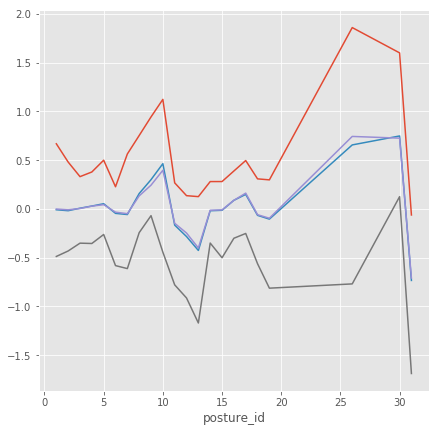

In [64]:
fig, ax = plt.subplots(figsize = (7, 7))
dos_train.groupby('posture_id')['LF'].max().plot(kind='line')
dos_train.groupby('posture_id')['LF'].mean().plot(kind='line')
dos_train.groupby('posture_id')['LF'].median().plot(kind='line')
dos_train.groupby('posture_id')['LF'].min().plot(kind='line');

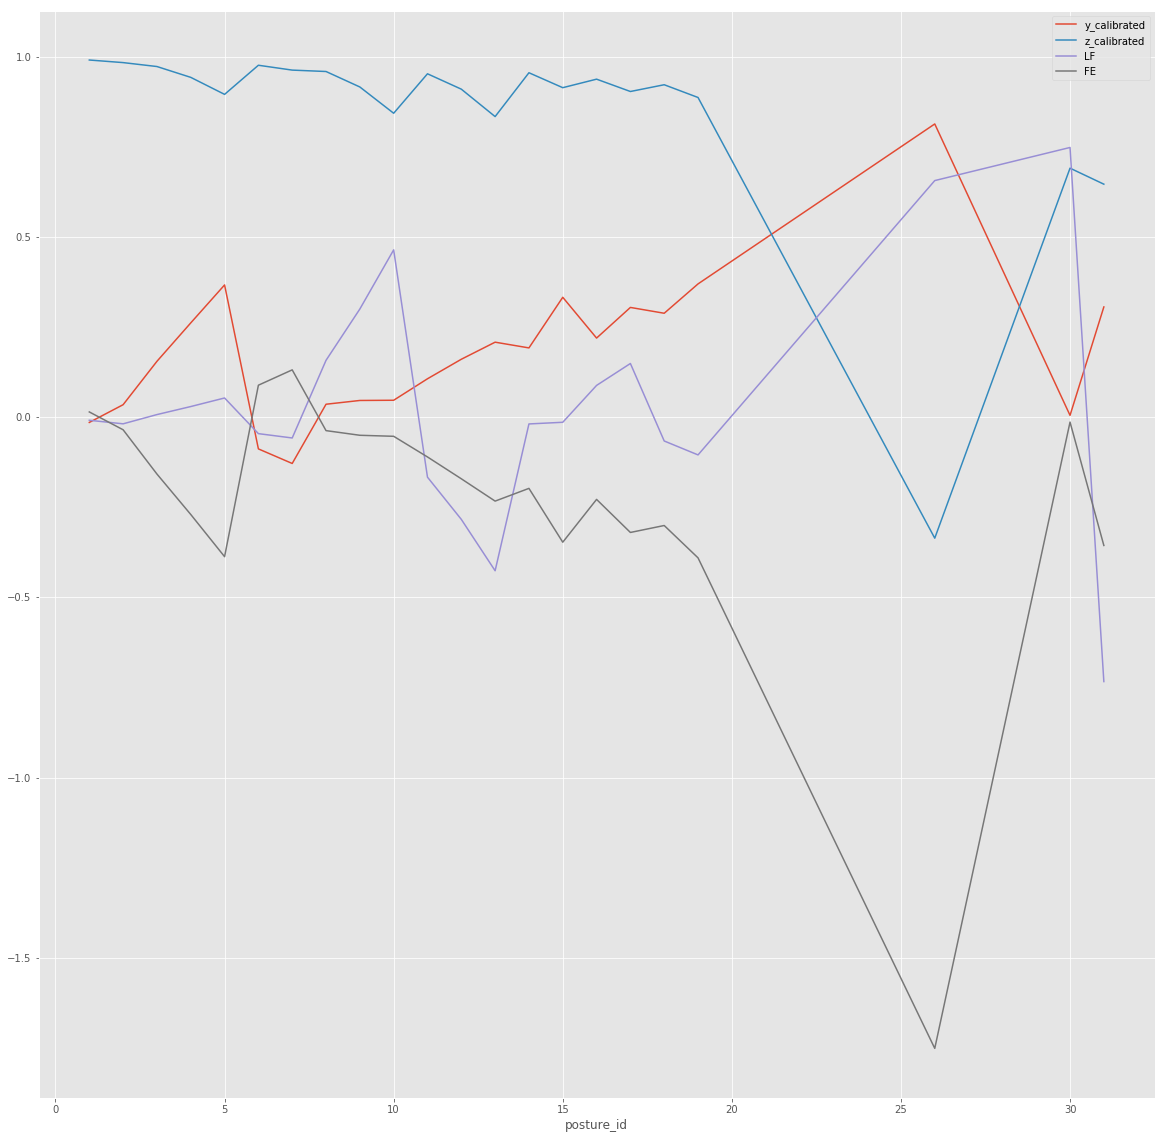

In [65]:
fig, ax = plt.subplots(figsize = (20, 20))


dos_train.groupby('posture_id')['y_calibrated'].mean().plot(kind='line')
dos_train.groupby('posture_id')['z_calibrated'].mean().plot(kind='line')
dos_train.groupby('posture_id')['LF'].mean().plot(kind='line')
dos_train.groupby('posture_id')['FE'].mean().plot(kind='line')

ax.legend();

In [66]:
dos_train.columns

Index(['nom', 'Inclinaison', 'Flexion', 'posture', 'posture_id',
       'timestamp_measure_session', 'x_calibrated', 'y_calibrated',
       'z_calibrated', 'FE', 'LF'],
      dtype='object')

In [67]:
x_calibrated_mean = pd.DataFrame(dos_train.groupby('posture_id')['x_calibrated'].mean())
y_calibrated_mean = pd.DataFrame(dos_train.groupby('posture_id')['y_calibrated'].mean())
z_calibrated_mean = pd.DataFrame(dos_train.groupby('posture_id')['z_calibrated'].mean())
fe_mean = pd.DataFrame(dos_train.groupby('posture_id')['FE'].mean())
lf_mean = pd.DataFrame(dos_train.groupby('posture_id')['LF'].mean())
flexion_mean = pd.DataFrame(dos_train.groupby('posture_id')['Flexion'].mean())
inclinaison_mean = pd.DataFrame(dos_train.groupby('posture_id')['Inclinaison'].mean())
posture_id_mean = pd.DataFrame(dos_train.groupby('posture_id')['posture_id'].mean())

mean_df = pd.concat([x_calibrated_mean, y_calibrated_mean, z_calibrated_mean, fe_mean, lf_mean, flexion_mean, inclinaison_mean, posture_id_mean], axis=1)
mean_df.to_csv('mean_df.csv', index = False)

In [68]:
mean_df.head()

,x_calibrated,y_calibrated,z_calibrated,FE,LF,Flexion,Inclinaison,posture_id
posture_id,,,,,,,,
1.0,-0.008219,-0.014365,0.991616,0.014769,-0.008382,0.0,0,1.0
2.0,-0.017899,0.034878,0.984442,-0.034754,-0.018212,0.0,0,2.0
3.0,0.007433,0.155265,0.973542,-0.157590,0.007437,3.0,0,3.0
4.0,0.029216,0.261909,0.943471,-0.269862,0.029730,5.0,0,4.0
5.0,0.051002,0.367264,0.896248,-0.386969,0.053519,8.0,0,5.0


# Preparing fo ML

In [69]:
dos_train = dos_train.dropna()

In [70]:
dos_train_inclinaison = dos_train[dos_train.posture_id != 26]

In [71]:
trainingcolumns = ['x_calibrated', 'y_calibrated', 'z_calibrated', 'FE', 'LF']

In [72]:
X_train_df = dos_train[trainingcolumns]

In [73]:
X_train_df_inclinaison = dos_train_inclinaison[trainingcolumns]

In [74]:
y_Inclinaison = dos_train['Inclinaison'].values
y_Flexion = dos_train['Flexion'].values
y_posture_id = dos_train['posture_id'].values
y_posture = dos_train['posture'].values
y_nom = dos_train['nom'].values

y_Inclinaison_i = dos_train_inclinaison['Inclinaison'].values
y_Flexion_i = dos_train_inclinaison['Flexion'].values
y_posture_id_i = dos_train_inclinaison['posture_id'].values
y_posture_i = dos_train_inclinaison['posture'].values
y_nom_i = dos_train_inclinaison['nom'].values

In [75]:
poly = PolynomialFeatures(degree = 2, include_bias=False, interaction_only=False)
poly2 = PolynomialFeatures(degree = 2, include_bias=False, interaction_only=False)

In [76]:
X_train = X_train_df.values
X_poly = poly.fit_transform(X_train)

X_train_i = X_train_df_inclinaison.values
X_poly_i = poly2.fit_transform(X_train_i)

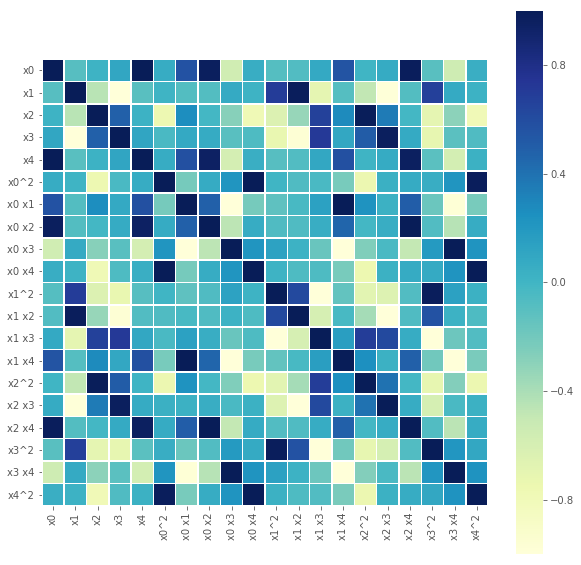

In [77]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(pd.DataFrame(X_poly_i, columns = poly2.get_feature_names()).corr(), 
            square = True,  cmap = "YlGnBu", linewidths = .5, cbar = True);

In [78]:
sc = StandardScaler()
sc_2 = StandardScaler()
sc_3 = StandardScaler()

X_sc = sc.fit_transform(X_train)
X_poly_sc = sc_2.fit_transform(X_poly)
X_poly_isc = sc_3.fit_transform(X_poly_i)

In [79]:
pca = PCA(n_components = 2)
pca_2 = PCA(n_components = 2)
pca_3 = PCA(n_components = 2)

X_pca = pca.fit_transform(X_sc)
X_poly_pca = pca_2.fit_transform(X_poly_sc)
X_poly_ipca = pca_3.fit_transform(X_poly_isc)

In [80]:
test_df2 = pd.DataFrame()
test_df2['X_1'] = X_poly_ipca[:, 0]
test_df2['X_2'] = X_poly_ipca[:, 1]

In [81]:
test_df = pd.DataFrame()

In [82]:
test_df['X_1'] = X_pca[:, 0]
test_df['X_2'] = X_pca[:, 1]
test_df['X_poly2_1'] = X_poly_pca[:, 0]
test_df['X_poly2_2'] = X_poly_pca[:, 1]

In [83]:
test_df['inclinaison'] = y_Inclinaison
test_df['flexion'] = y_Flexion
test_df['posture'] = y_posture
test_df['posture_id'] = y_posture_id
test_df['nom'] = y_nom

test_df2['inclinaison'] = y_Inclinaison_i
test_df2['flexion'] = y_Flexion_i
test_df2['posture'] = y_posture_i
test_df2['posture_id'] = y_posture_id_i
test_df2['nom'] = y_nom_i

In [93]:
test_df.to_csv('test_df.csv', index = False)

# Training

    X_train, X_poly2, and X_poly3, and comparing results

In [84]:
alpha = [1, 0.5, 0.1, 0.05, 0.025, 0.01, 0.005, 0.001, 0.0007, 0.0001]

max_iter = [100000, 200000]

tol = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0007, 0.0004, 0.0001]

hyperparameter_grid = {'alpha': alpha,
                       'max_iter': max_iter,
                       'tol': tol}

clf = linear_model.Lasso(copy_X=True, selection= 'random')

random_cv = RandomizedSearchCV(estimator=clf,
                               param_distributions=hyperparameter_grid,
                               cv=3, n_iter=50, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = 8, verbose = 1000, 
                               return_train_score = True,
                               random_state=42)

In [745]:
random_cv.fit(X_poly, y_Flexion)

Fitting 2 folds for each of 50 candidates, totalling 100 fits
[CV] tol=0.05, max_iter=200000, alpha=0.005 ..........................
[CV] tol=0.05, max_iter=200000, alpha=0.005 ..........................
Memmaping (shape=(206951, 20), dtype=float64) to new file /var/folders/wb/0z4gzm2n6t7_12hnf510sjpm0000gn/T/joblib_memmaping_pool_24796_4705598992/24796-4807501920-9f0975b613bc52dc70449e38927ceb7a.pkl
Memmaping (shape=(206951,), dtype=float64) to new file /var/folders/wb/0z4gzm2n6t7_12hnf510sjpm0000gn/T/joblib_memmaping_pool_24796_4705598992/24796-4807501920-2519568c4aa9c6ee3cd493a24dcaa6cb.pkl
Pickling array (shape=(103475,), dtype=int64).
Pickling array (shape=(103476,), dtype=int64).
Memmaping (shape=(206951, 20), dtype=float64) to old file /var/folders/wb/0z4gzm2n6t7_12hnf510sjpm0000gn/T/joblib_memmaping_pool_24796_4705598992/24796-4807501920-9f0975b613bc52dc70449e38927ceb7a.pkl
Memmaping (shape=(206951,), dtype=float64) to old file /var/folders/wb/0z4gzm2n6t7_12hnf510sjpm0000gn/T/j

Process ForkPoolWorker-90:
Process ForkPoolWorker-89:
Process ForkPoolWorker-93:
Process ForkPoolWorker-95:
Process ForkPoolWorker-94:
Process ForkPoolWorker-92:
Process ForkPoolWorker-96:
Process ForkPoolWorker-91:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python/3.6.5/Frameworks/Pyt

KeyboardInterrupt: 

In [119]:
# best params alpha = .1, tol=.0001
clf = linear_model.Lasso(alpha = .01, max_iter=500000, tol = 0.0001)
clf

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=500000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [120]:
clf.fit(X_poly, y_Flexion)
reg_pred = clf.predict(X_poly_i)
test_df2['flexion_lasso2'] = reg_pred

In [121]:
joblib.dump(clf, 'fl_lasso2.pkl')

['fl_lasso2.pkl']

In [115]:
# best params alpha = .1, tol=.0001
clf = linear_model.Lasso(alpha = .1, max_iter=500000, tol = 0.0001)
clf

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=500000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [116]:
clf.fit(X_poly_i, y_Inclinaison_i)
reg_pred = clf.predict(X_poly_i)
test_df2['inclinaison_lasso3'] = reg_pred

In [117]:
joblib.dump(clf, 'inc_lasso3.pkl')

['inc_lasso3.pkl']

In [118]:
test_df2.to_csv('test_dfe2.csv', index = False)

In [85]:
khalil_df = pd.read_csv('alamikhalil_2018612.csv')

In [86]:
khalil_df.head()

,timestamp,currenttime,accX,accY,accZ,flexion,inclinaison,postureF,postureI,score
0,1531401928455,37,0.001261,0.016520,1.007350,1.624072,-0.012133,2,0,1
1,1531401928595,39,0.001351,0.017578,1.007308,1.650438,-0.009684,2,0,1
2,1531401928640,39,0.001297,0.018111,1.007295,1.650438,-0.009684,2,0,1
3,1531401928776,41,0.001220,0.018171,1.007303,1.661266,-0.009539,2,0,1
4,1531401928826,41,0.001071,0.017822,1.007331,1.661266,-0.009539,2,0,1


In [94]:
khalil_df = khalil_df[:42000]

In [99]:
length = int(khalil_df.shape[0] / 10)
length

4200

In [100]:
first_df = khalil_df[:length]
second_df = khalil_df[length:length*2]
third_df = khalil_df[length*2:length*3]
fourth_df = khalil_df[length*3:length*4]
fifth_df = khalil_df[length*4:length*5]

sixth_df = khalil_df[length*5:length*6]
seventh_df = khalil_df[length*6:length*7]
eight_df = khalil_df[length*7:length*8]
ninght_df = khalil_df[length*8:length*9]
tenth_df = khalil_df[length*9:length*10]

In [112]:
fourth_df.head()

,timestamp,currenttime,accX,accY,accZ,flexion,inclinaison,postureF,postureI,score
12600,1531403188112,2023,-0.000348,-0.373391,0.936061,-0.837648,-0.015908,-1,0,0
12601,1531403188208,2024,-0.000409,-0.373516,0.936011,-0.838277,-0.016227,-1,0,0
12602,1531403188308,2025,-0.000433,-0.373632,0.935965,-0.839127,-0.016477,-1,0,0
12603,1531403188411,2026,-0.000412,-0.373768,0.935911,-0.839875,-0.016578,-1,0,0
12604,1531403188506,2027,-0.000373,-0.373893,0.935861,-0.840679,-0.016491,-1,0,0


In [106]:
first_df.columns

Index(['timestamp', ' currenttime', '  accX', ' accY', ' accZ', ' flexion',
       ' inclinaison', ' postureF', ' postureI', ' score'],
      dtype='object')

In [113]:
first_score = first_df[' score'].sum() / length
second_score = second_df[' score'].sum() / length
third_score = third_df[' score'].sum() / length
fourth_score = fourth_df[' score'].sum() / length
fifth_score = fifth_df[' score'].sum() / length

sixth_score = sixth_df[' score'].sum() / length
seventh_score = seventh_df[' score'].sum() / length
eight_score = eight_df[' score'].sum() / length
ninght_score = ninght_df[' score'].sum() / length
tenth_score = tenth_df[' score'].sum() / length

In [114]:
print('first_score', first_score)
print('second_score', second_score)
print('third_score', third_score)
print('fourth_score', fourth_score)
print('fifth_score', fifth_score)

print('sixth_score', sixth_score)
print('seventh_score', seventh_score)
print('eight_score', eight_score)
print('ninght_score', ninght_score)
print('tenth_score', tenth_score)

first_score 0.6316666666666667
second_score 0.5454761904761904
third_score 0.10214285714285715
fourth_score 0.675
fifth_score 0.5880952380952381
sixth_score 0.9716666666666667
seventh_score 0.6769047619047619
eight_score 0.12214285714285714
ninght_score 0.4542857142857143
tenth_score 0.4195238095238095


In [115]:
grades = (first_score, second_score, third_score, fourth_score, fifth_score, sixth_score, seventh_score, eight_score, ninght_score, tenth_score)


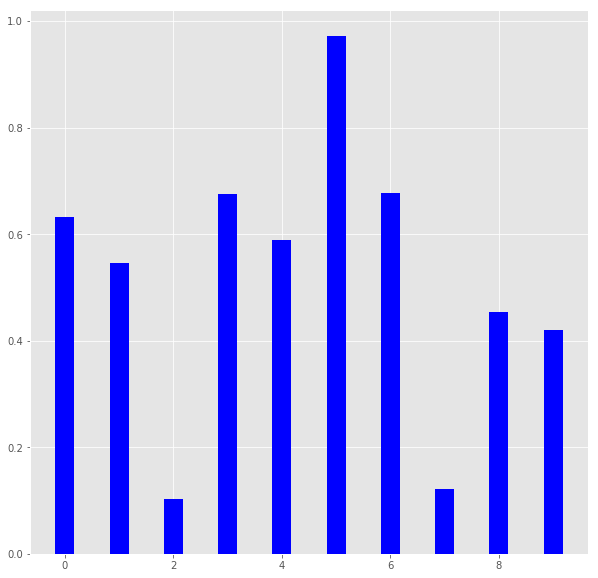

In [119]:
fig, ax = plt.subplots(figsize = (10, 10))
bar_width = 0.35
opacity = 0.4
index = np.arange(10)

rects1 = ax.bar(index, grades, bar_width, color='b')

# Scoring regression

In [465]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000000, centers=1000000, n_features=2, random_state=0, center_box=(-20.0, 20.0))

test_df = pd.DataFrame()
test_df['x'] = X[:,0]
test_df['y'] = X[:,1]

test_df = test_df[test_df.y < 3]
test_df = test_df[test_df.y > -3]
test_df = test_df[test_df.x < 10]
test_df = test_df[test_df.x > -10]

In [466]:
score_df = pd.read_csv('notepostures.csv', sep=';')

In [467]:
score_df.head()

,FE,LF,Grade
0,0,0,100
1,1,0,95
2,2,0,88
3,3,0,80
4,4,0,70


In [468]:
score_df.columns

Index(['FE', 'LF', 'Grade'], dtype='object')

In [469]:
score_df = score_df[['FE', 'LF', 'Grade']]

In [470]:
score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 3 columns):
FE       164 non-null int64
LF       164 non-null int64
Grade    164 non-null int64
dtypes: int64(3)
memory usage: 3.9 KB


In [491]:
test_df.columns

Index(['x', 'y', 'reg_knn'], dtype='object')

In [494]:
X_score = score_df[['FE', 'LF']].values
y_score = score_df[['Grade']].values

X_score2 = test_df[['x', 'y']].values
y_score2 = test_df.reg_knn.values

In [495]:
score_reg = pd.DataFrame()
score_reg['fe'] = X_score[:,0]
score_reg['lf'] = X_score[:,1]
score_reg['score'] = y_score

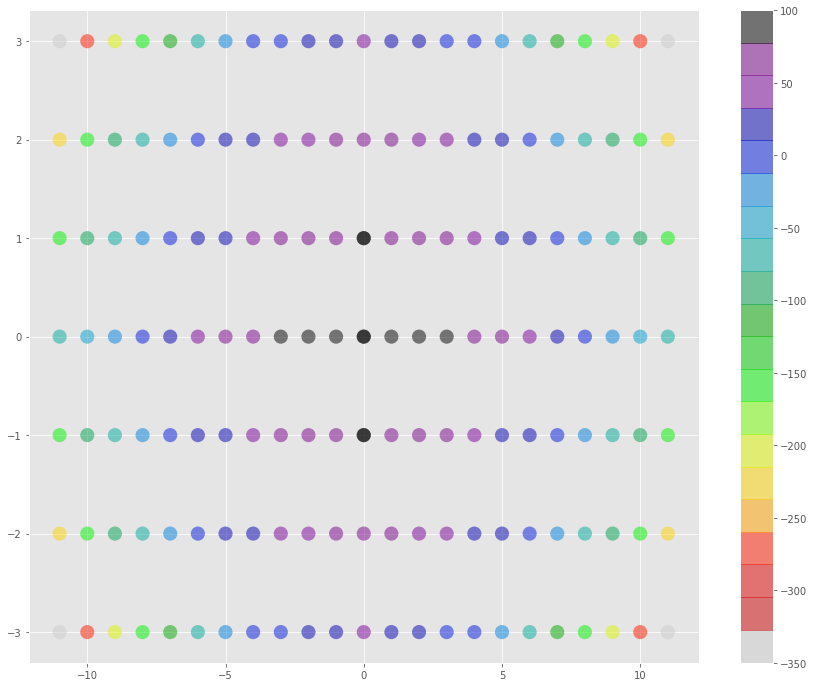

In [496]:
plt.figure(figsize=(15, 12))

plt.scatter(score_reg.fe, score_reg.lf,
            c = score_reg.score, s = 200,
            edgecolor = 'none', alpha = 0.5, 
            cmap = plt.cm.get_cmap('nipy_spectral_r', 20));

plt.colorbar();

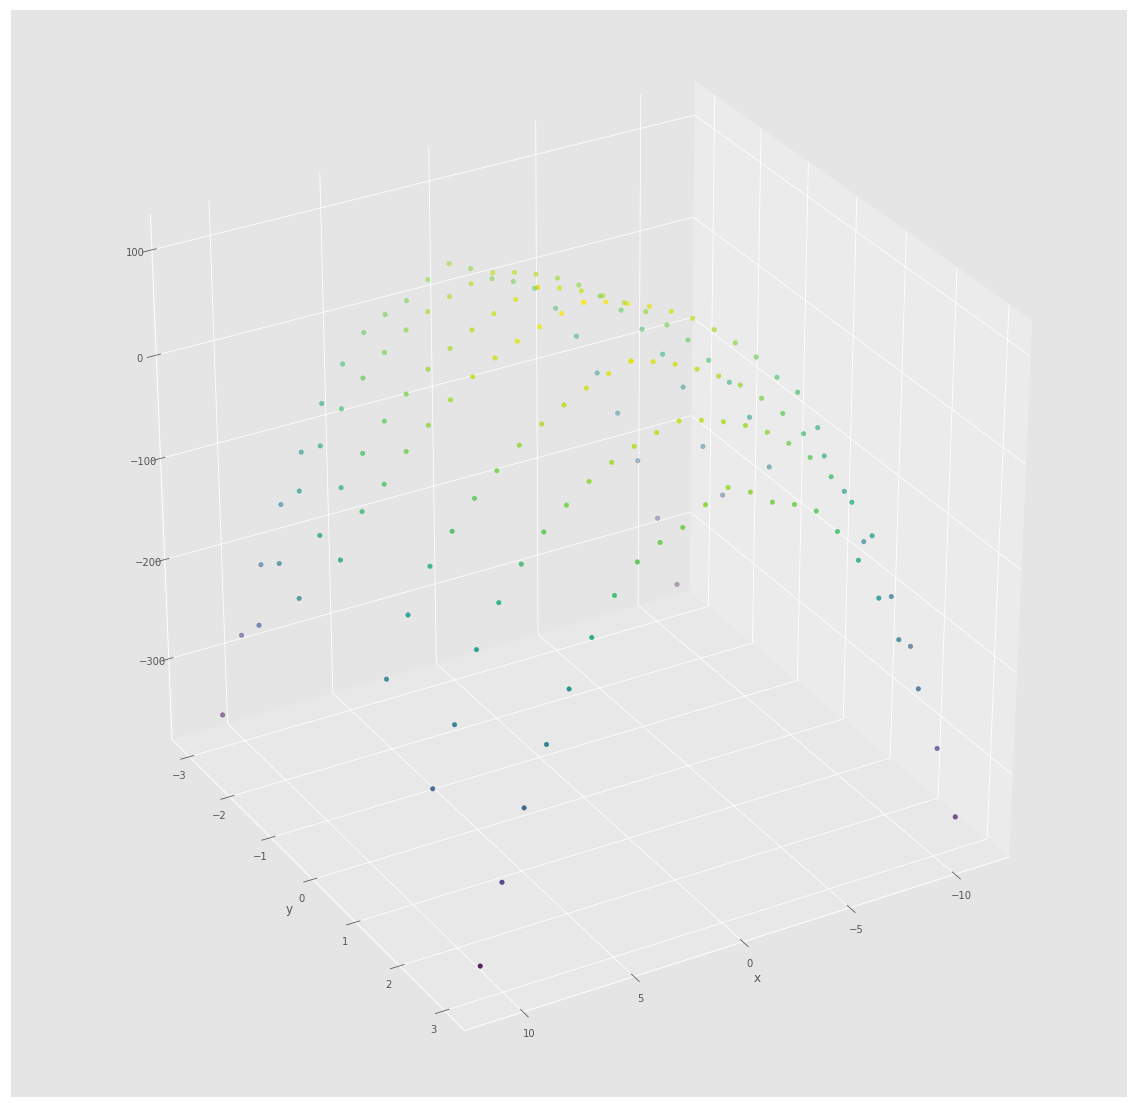

In [482]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(score_reg.fe, score_reg.lf, score_reg.score, zdir = 'z', c= score_reg.score,
               s = 20, depthshade = True)

plt.xlabel('x')
plt.ylabel('y')

ax.view_init(30, 60);

In [486]:
clf = sklearn.neighbors.KNeighborsRegressor(n_neighbors = 1, leaf_size = 3)
#clf = sklearn.tree.ExtraTreeRegressor()
clf

KNeighborsRegressor(algorithm='auto', leaf_size=3, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform')

In [487]:
clf.fit(X_score, y_score)

reg_pred = clf.predict(test_df[['x', 'y']].values )
test_df['reg_knn'] = reg_pred

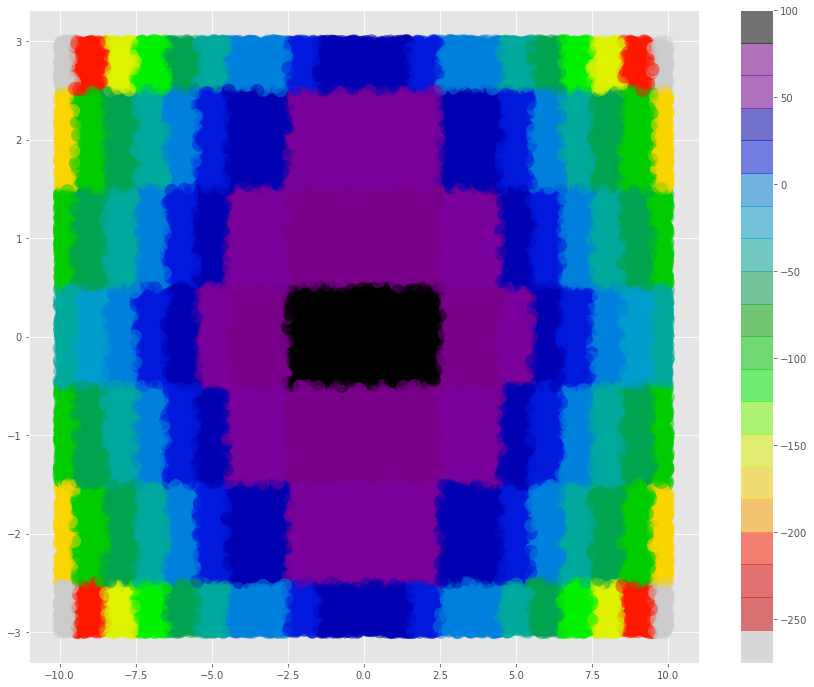

In [488]:
plt.figure(figsize=(15, 12))

plt.scatter(test_df.x, test_df.y,
            c = test_df.reg_knn, s = 200,
            edgecolor = 'none', alpha = 0.5, 
            cmap = plt.cm.get_cmap('nipy_spectral_r', 20));

plt.colorbar();

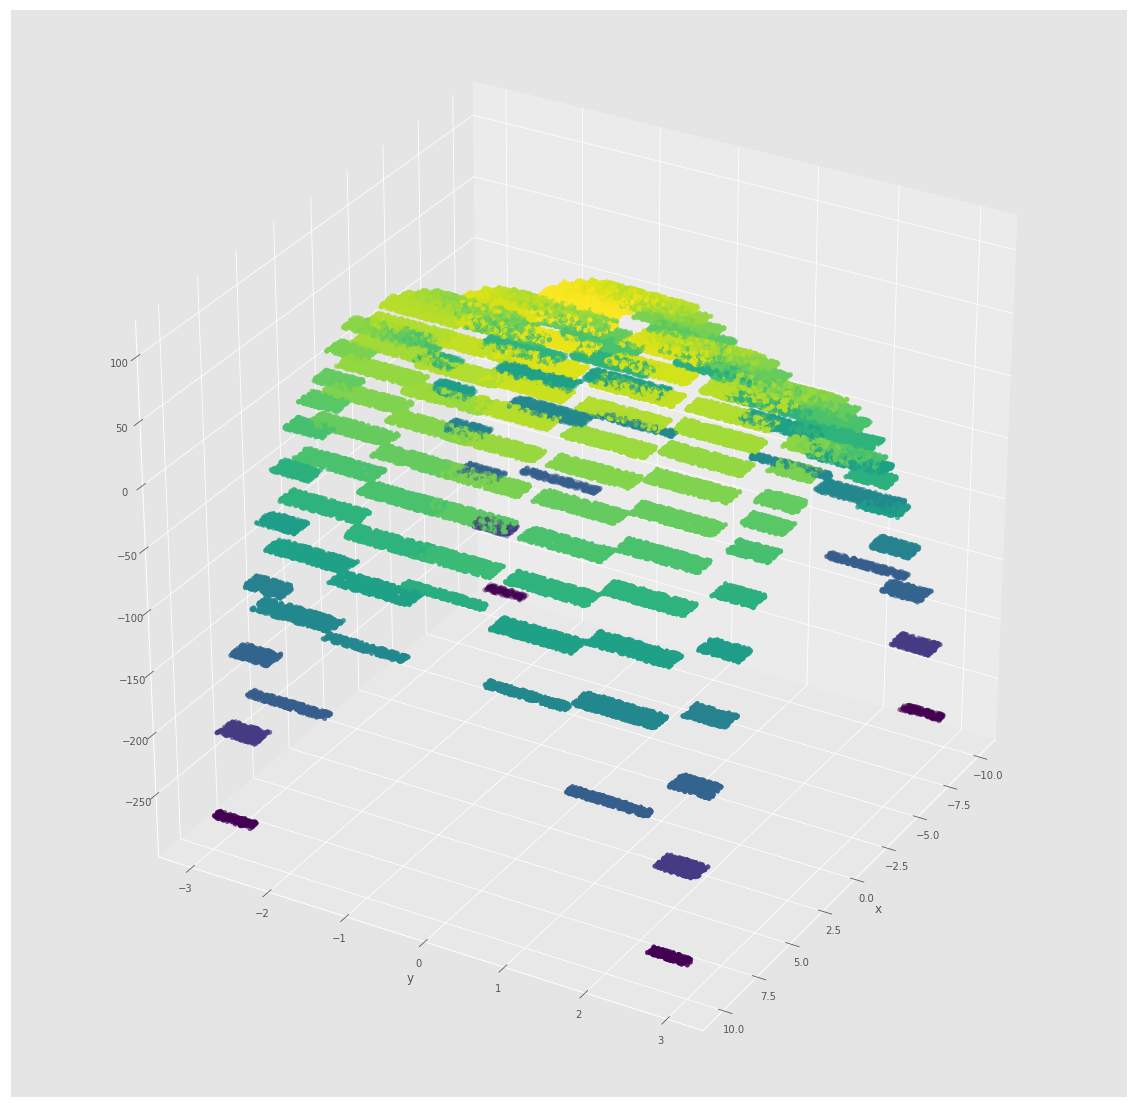

In [489]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(test_df.x, test_df.y, test_df.reg_knn, zdir = 'z', c= test_df.reg_knn,
               s = 20, depthshade = True)

plt.xlabel('x')
plt.ylabel('y')

ax.view_init(30, 30);

In [508]:
clf = sklearn.svm.SVR(C = .1, degree = 2, kernel='rbf')
clf

SVR(C=0.1, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [509]:
clf.fit(X_score2, y_score2)
reg_pred = clf.predict(X_score2)
test_df['reg_sgd'] = reg_pred

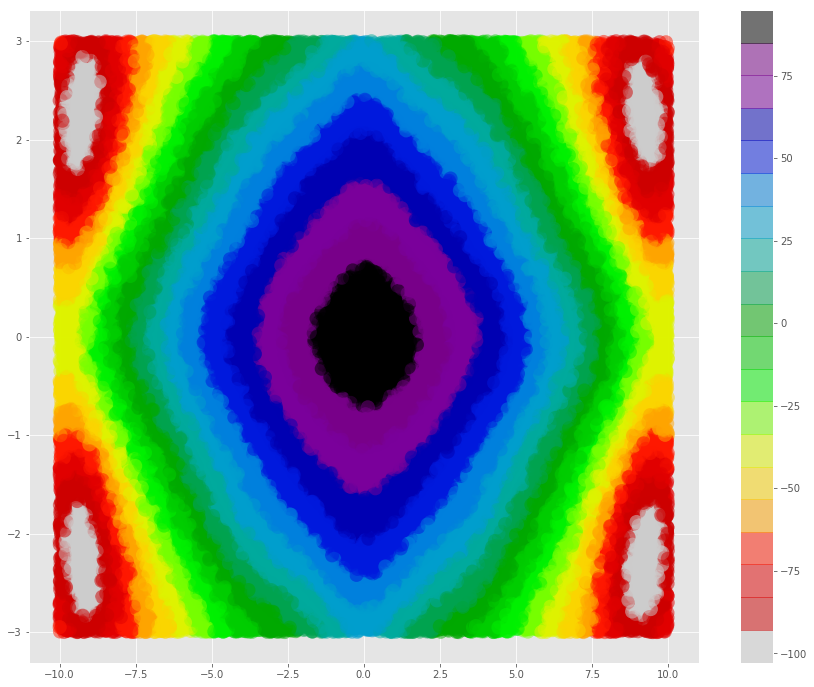

In [510]:
plt.figure(figsize=(15, 12))

plt.scatter(test_df.x, test_df.y,
            c = test_df.reg_sgd, s = 200,
            edgecolor = 'none', alpha = 0.5, 
            cmap = plt.cm.get_cmap('nipy_spectral_r', 20));

plt.colorbar();

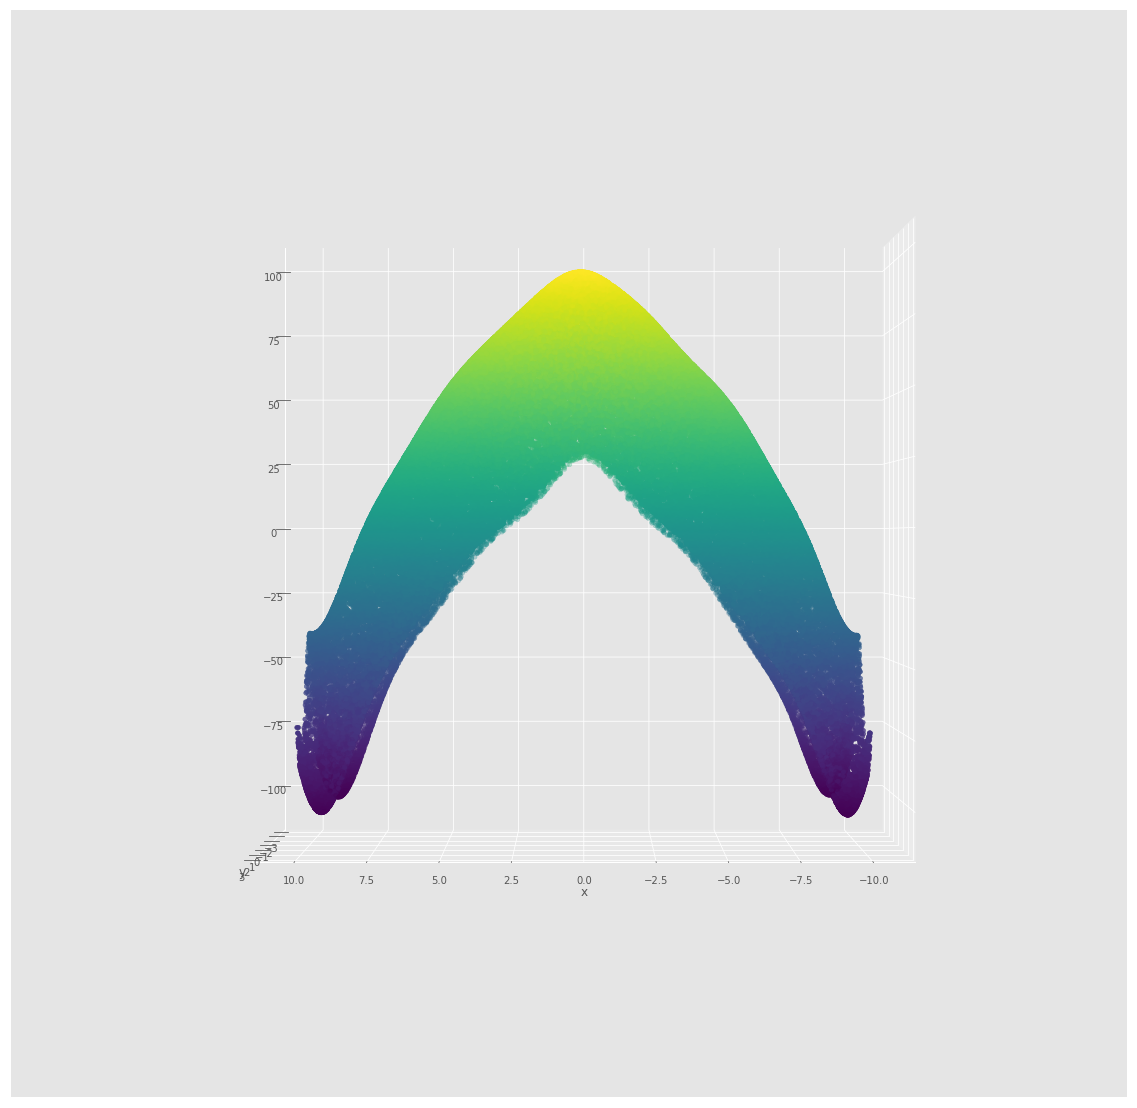

In [513]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(test_df.x, test_df.y, test_df.reg_sgd, zdir = 'z', c= test_df.reg_sgd,
               s = 20, depthshade = True)

plt.xlabel('x')
plt.ylabel('y')

ax.view_init(0, 90);